In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
obj = pd.read_pickle("../sum_20group_20factor_from1_rand10_resource36.pkl")

max_samples = 70

values_dict = obj["values_dict"]
elapsed_times_dict = obj["elapsed_times_dict"]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


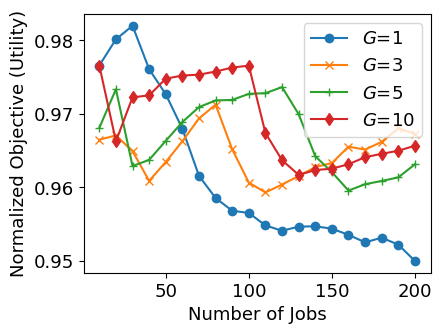

In [3]:
xs = defaultdict(list)
ys = defaultdict(list)
yerrs = defaultdict(list)
for (factor, num_children), values in values_dict.items():
    xs[num_children].append(factor * 10)
    values = np.array(values)[:, :max_samples]
    ys[num_children].append(values.mean(axis=0).mean() / factor / 10)
    yerrs[num_children].append(values.std(axis=0).mean() / factor / 10)

num_childrens = sorted(xs.keys())
num_childrens.remove(2)
num_childrens.remove(20)

markers = ["o", "x", "+", "d", "s", "*", "h", "v"][::-1]

plt.rcParams.update({'font.size': 13})

factor = 0.7
fig, ax = plt.subplots(figsize=(6.4 * factor, 4.8 * factor))
for num_children in num_childrens:
# for num_children in [1, 5, 10]:
    marker = markers.pop()
    line = ax.plot(xs[num_children], ys[num_children], label=r"$G$="f"{num_children}", marker=marker)[0]
    if num_children > 1:
        v = np.array(ys[num_children])
        err = np.array(yerrs[num_children])
        # ax.fill_between(xs[num_children], v-err, v+err, alpha=0.5, color=line.get_color())
# ax = plt.plot(factors, [np.mean(mark_values[factor]) / factor for factor in factors], label="mark")
ax.set_xlabel("Number of Jobs")
ax.set_ylabel("Normalized Objective (Utility)")
ax.legend()
fig.savefig("images/hierarhical_util.eps", bbox_inches='tight')

In [4]:
base = np.array(ys[1])
for num_children in num_childrens:
    if num_children == 1:
        continue
    target_y = np.array(ys[num_children])
    ratio = target_y / base
    print(num_children, ratio.min(), ratio.max())

3 0.9826220426755353 1.0182019465633567
5 0.9805621790857223 1.0204887473893611
10 0.9858466118553345 1.0209538184532492


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


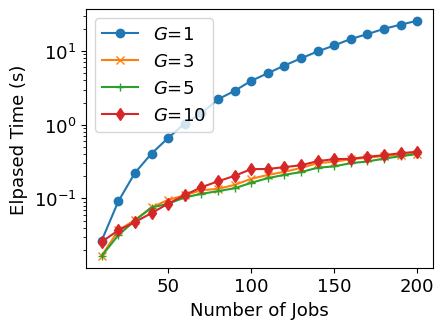

In [5]:
xs = defaultdict(list)
ys = defaultdict(list)
yerrs = defaultdict(list)
for (factor, num_children), values in elapsed_times_dict.items():
    xs[num_children].append(factor * 10)
    values = np.array(values)[:, :70]
    ys[num_children].append(values.mean(axis=0).mean())
    yerrs[num_children].append(values.std(axis=0).mean())

markers = ["o", "x", "+", "d", "s", "*", "h", "v"][::-1]

factor = 0.7
fig, ax = plt.subplots(figsize=(6.4 * factor, 4.8 * factor))
for num_children in num_childrens:
# for num_children in [1, 5, 10]:
    marker = markers.pop()
    ax.plot(xs[num_children], ys[num_children], label=r"$G$="f"{num_children}", marker=marker)
    # if num_children > 1:
    #     v = np.array(ys[num_children])
    #     err = np.array(yerrs[num_children])
    #     ax.fill_between(xs[num_children], v-err, v+err, alpha=0.5, color=line.get_color())
ax.set_yscale('log')
ax.set_xlabel("Number of Jobs")
ax.set_ylabel("Elpased Time (s)")
ax.legend()
plt.savefig("images/hierarchical_time.eps", bbox_inches="tight")

In [6]:
base = np.array(ys[1])
# print(base)
for num_children in num_childrens:
    if num_children == 1:
        continue
    target_y = np.array(ys[num_children])
    ratio = base / target_y
    print(num_children, ratio.min(), ratio.max(), xs[num_children][ratio.argmin()], xs[num_children][ratio.argmax()])

3 1.6103266495034927 63.56534143022079 10 200
5 1.6150903480601995 64.29287630355701 10 200
10 1.0369710957265441 59.792412214890746 10 200
